In [1]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt


Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#result_table = Simbad.query_object("Gaia DR2 4687500098271761792")
#raValue = result_table['RA']
#decValue = result_table['DEC']
raValue = [132.825]
decValue = [11.8]

In [3]:
coord = SkyCoord(ra=raValue, dec=decValue, unit=(u.degree, u.degree), frame='icrs')

query = """SELECT TOP 1000 ra,dec,pmra,pmdec FROM gaiaedr3.gaia_source 
           WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec), 
           CIRCLE('ICRS',{ra},{dec},0.2777777777777778))=1 ORDER BY random_index""".format(ra=str(coord.ra.deg[0]),dec=str(coord.dec.deg[0]))


job = Gaia.launch_job_async(query)  
r = job.get_results()



INFO: Query finished. [astroquery.utils.tap.core]


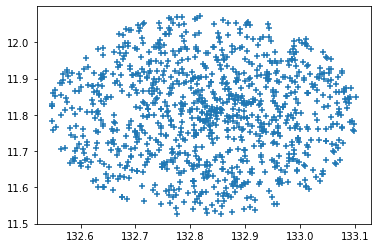

In [4]:
ralist = r['ra'].tolist()
declist = r['dec'].tolist()

plt.scatter(ralist,declist,marker='+')
plt.show()

In [5]:
r.pprint()

        ra                dec                 pmra               pmdec        
       deg                deg               mas / yr            mas / yr      
------------------ ------------------ ------------------- --------------------
 132.9743416822167 11.852555207267613                  --                   --
132.85848991452696 11.649710919162853  -10.23892728408197   -3.325563736415543
132.67174700322008  11.93769599706798 -10.979986011763685   -2.919521351371557
 132.9058083722677 11.834794012600288 -11.297739293957925  -3.1202253359037333
133.01513552196468  11.59463701978955 -10.890812086050827  -3.2212897643821363
132.88648631241915 11.706331508043872                  --                   --
               ...                ...                 ...                  ...
132.78801208502654  11.64635800939035 -1.3115528015536033 -0.49890965505615315
 132.7819971649845 11.752247774537867                  --                   --
133.01477662817524 11.689962317917043  -10.812874071

In [6]:
#print(r[0])

In [13]:
coord = SkyCoord(ra=raValue, dec=decValue, unit=(u.degree, u.degree), frame='icrs')

query = """SELECT TOP 1000 ra,dec,pmra,pmdec FROM gaiaedr3.gaia_source 
           WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec), 
           BOX('ICRS',{ra},{dec},0.1,0.1))=1 ORDER BY random_index""".format(ra=str(coord.ra.deg[0]),dec=str(coord.dec.deg[0]))


job = Gaia.launch_job_async(query,dump_to_file = True, output_format = 'csv')  
r = job.get_results()



Saving results to: 1625311627012O-result.csv


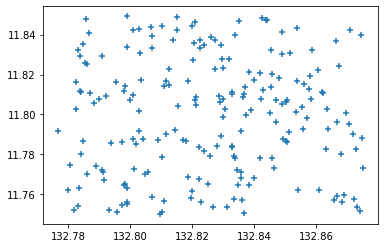

In [14]:
ralist = r['ra'].tolist()
declist = r['dec'].tolist()

plt.scatter(ralist,declist,marker='+')
plt.show()

In [15]:
print(job)

<Table length=205>
 name  dtype     class     n_bad
----- ------- ------------ -----
   ra float64       Column     0
  dec float64       Column     0
 pmra float64 MaskedColumn    15
pmdec float64 MaskedColumn    15
Jobid: 1625311627012O
Phase: COMPLETED
Owner: None
Output file: 1625311627012O-result.csv
Results: None


In [20]:
a = job

In [26]:
a=job.__dict__

In [27]:
a["outputFile"]

'1625311627012O-result.csv'